In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('FuelConsumptionCo2.csv')

In [3]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
MODELYEAR                   1067 non-null int64
MAKE                        1067 non-null object
MODEL                       1067 non-null object
VEHICLECLASS                1067 non-null object
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null object
FUELTYPE                    1067 non-null object
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int64(4), object(5)
memory usage: 108.4+ KB


In [13]:
X_INPUT = data.iloc[:, 0:12]
Y_TARGET = data.iloc[:, 12]

In [15]:
X_INPUT.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27


In [16]:
Y_TARGET.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

In [19]:
X_INPUT.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
dtype: object

In [148]:
X_IN = data[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'FUELCONSUMPTION_HWY']]

In [38]:
data[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']].corr()

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
CYLINDERS,1.000000,0.934011,0.776788,0.849685
ENGINESIZE,0.934011,1.000000,0.819482,0.874154
FUELCONSUMPTION_COMB,0.776788,0.819482,1.000000,0.892129
CO2EMISSIONS,0.849685,0.874154,0.892129,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64acbb49b0>,
      dtype=object)

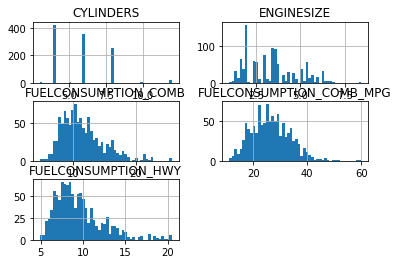

In [39]:
X_IN.hist(bins=50)

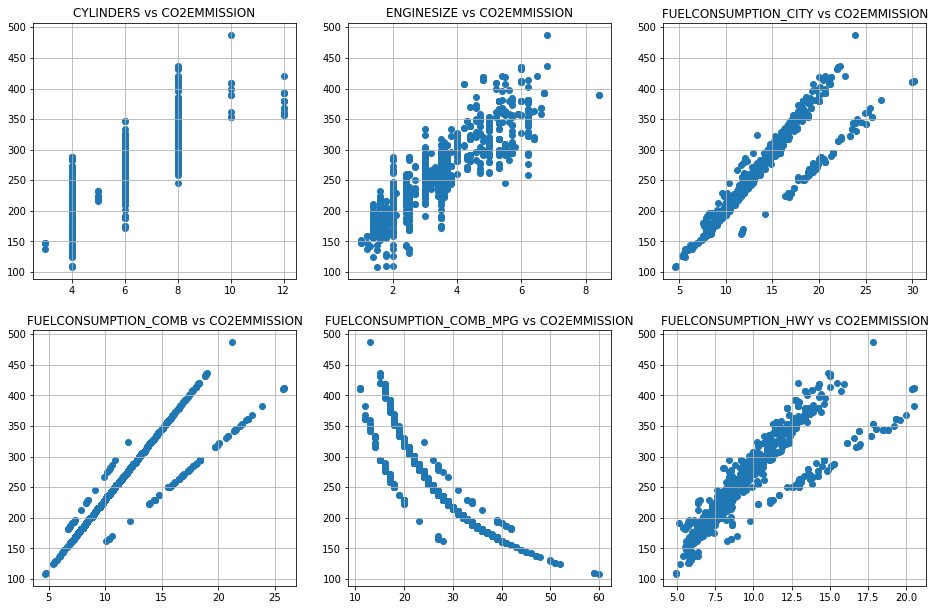

In [59]:
plt.figure(figsize=(16, 16))
idx = 1
for col in X_IN:
    plt.subplot(3, 3, idx)
    plt.scatter(X_IN[col], Y_TARGET)
    plt.title(col+' vs '+'CO2EMMISSION')
    plt.grid()
    idx = idx + 1
plt.show()

In [64]:
XX, YY = X_IN.ENGINESIZE, Y_TARGET

In [80]:
XS, YS = np.asanyarray(XX), np.asanyarray(YY)

In [86]:
type(XS), type(YS)

(numpy.ndarray, numpy.ndarray)

In [81]:
from sklearn.model_selection import train_test_split

In [88]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(XS, YS)

In [113]:
X_TRAIN = X_TRAIN.reshape(len(X_TRAIN), 1)

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
model = LinearRegression()
model.fit(X_TRAIN, Y_TRAIN)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [116]:
import seaborn as sns

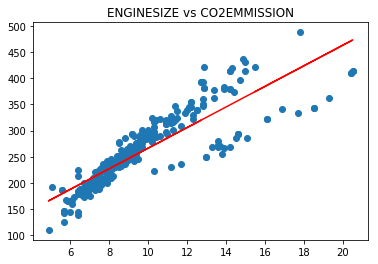

In [117]:
YP = model.predict(X_TEST.reshape(-1, 1))
plt.scatter(x=X_TEST, y=Y_TEST)
plt.plot(X_TEST, YP, 'r')
plt.title('ENGINESIZE vs CO2EMMISSION')
plt.show()

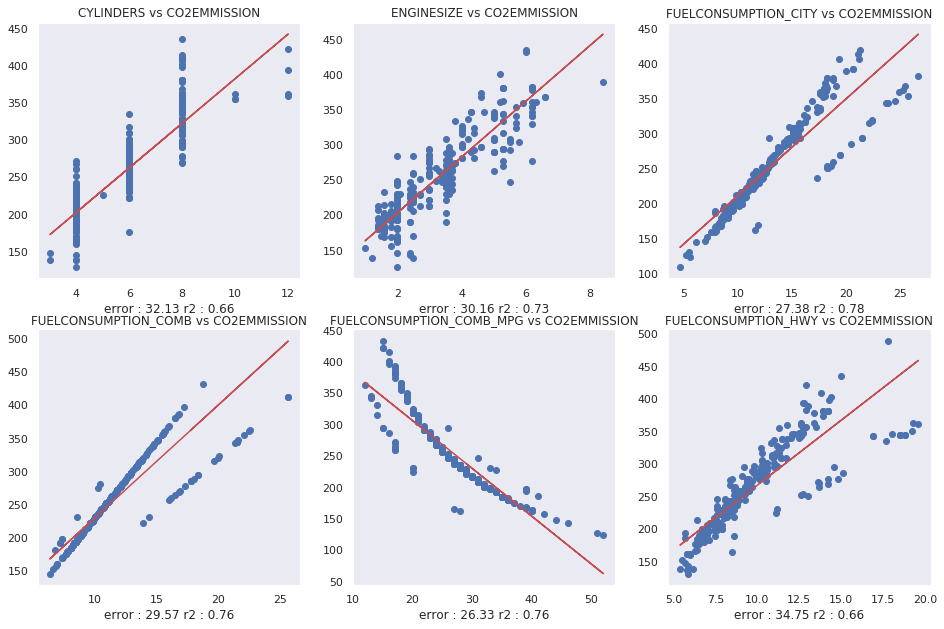

In [157]:
from sklearn.linear_model import LinearRegression
import math
plt.figure(figsize=(16, 16))
idx = 1
for col in X_IN:
    XS, YS = np.asanyarray(X_IN[col]), np.asanyarray(Y_TARGET)
    X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(XS, YS)
    X_TRAIN = X_TRAIN.reshape(-1, 1)
    X_TEST = X_TEST.reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(X_TRAIN, Y_TRAIN)
    YP = model.predict(X_TEST)
    
    from sklearn.metrics import mean_squared_error, r2_score
    error = math.sqrt(mean_squared_error(YP, Y_TEST))
    r2score = r2_score(YP, Y_TEST)
    
    plt.subplot(3, 3, idx)
    plt.scatter(x=X_TEST, y=Y_TEST)
    plt.grid()
    plt.plot(X_TEST, YP, 'r')
    plt.title(col+' vs CO2EMMISSION')
    plt.xlabel('error : {:.2f} r2 : {:.2f}'.format(error, r2score))
    
    idx = idx + 1
    
plt.show()

In [123]:
new_data = X_IN

In [124]:
new_data['Y'] = Y_TARGET

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


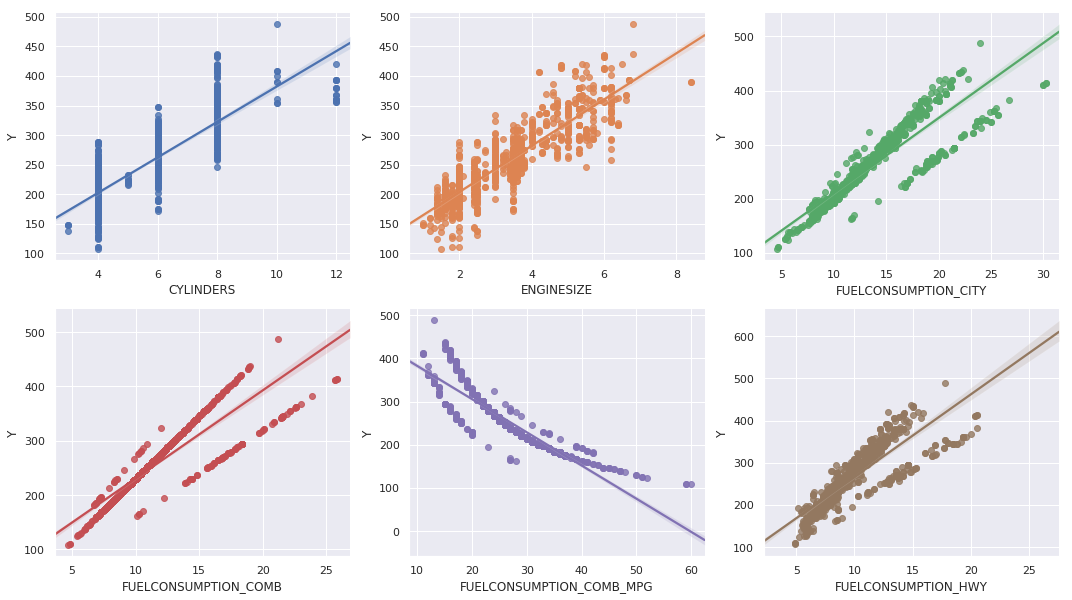

In [144]:
f, axes = plt.subplots(2, 3, figsize=(18, 10))
# sns.set(rc={'figure.figsize':(18, 6)})
idx = 0
jdx = 0
for col in ['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG',
       'FUELCONSUMPTION_HWY']:
    if (idx > 2):
        idx = 0
        jdx = jdx + 1
    sns.regplot(x = str(col), y = 'Y', data = new_data, ax = axes[jdx, idx])
    sns.despine()
    idx = idx + 1